#1 - Rede Neural Artificial (MLP) utilizando o minist

In [ ]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Carrega os dados MNIST
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data.astype('float32')
y = mnist.target.astype('int64')

# Divide os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

mlp = MLPClassifier(random_state=42, hidden_layer_sizes = (100,), activation= 'relu', solver = 'adam', learning_rate_init = 0.001, max_iter = 100)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia no conjunto de teste: {accuracy:.4f}')



/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Acurácia no conjunto de teste: 0.9579


#2 - Autoencoder para remover ruído de imagem utilizando o fashion minist

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

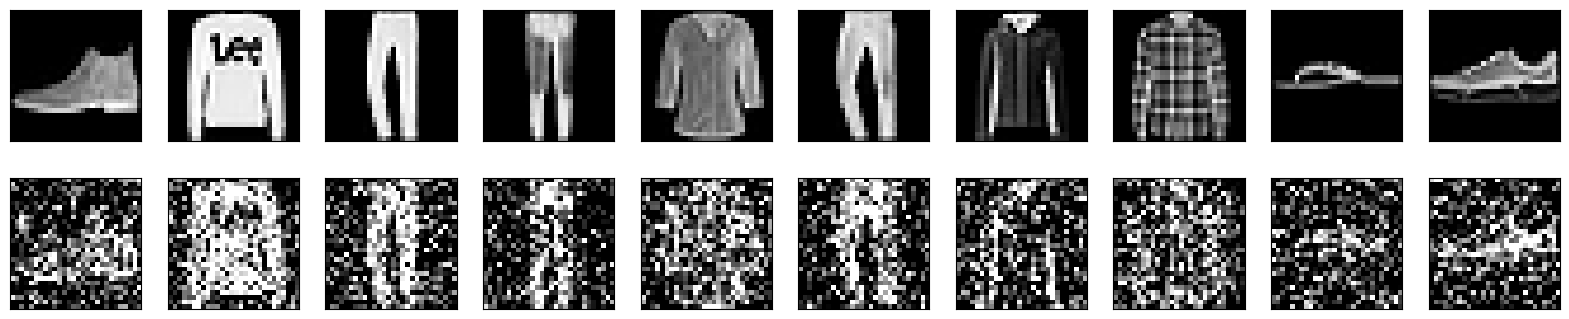

In [ ]:

from keras.callbacks import EarlyStopping

# Carregar o conjunto de dados Fashion MNIST
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalizar os dados para o intervalo [0, 1]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Adicionando ruídos às imagens
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Colocar os valores entre 0 e 1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Exibir algumas imagens originais e com ruído
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Imagem original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Imagem com ruído
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, losses


# Definir o encoder
encoder = tf.keras.Sequential([
      layers.Input(shape=(28, 28, 1)),
      layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

# Definir o decoder
decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

# Criar a sequência do autoencoder
autoencoder_input = layers.Input(shape=(28, 28, 1))
encoded = encoder(autoencoder_input)
decoded = decoder(encoded)
autoencoder = tf.keras.Model(autoencoder_input, decoded)

# Compilar o modelo
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

# Treinar o modelo
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# Resumo das camadas do encoder e decoder
encoder.summary()
decoder.summary()





Epoch 1/10
1875/1875 [==============================] - 86s 43ms/step - loss: 0.0272 - val_loss: 0.0209
Epoch 2/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0204 - val_loss: 0.0200
Epoch 3/10
1875/1875 [==============================] - 76s 41ms/step - loss: 0.0196 - val_loss: 0.0194
Epoch 4/10
1875/1875 [==============================] - 76s 40ms/step - loss: 0.0190 - val_loss: 0.0188
Epoch 5/10
1875/1875 [==============================] - 76s 40ms/step - loss: 0.0187 - val_loss: 0.0186
Epoch 6/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0184 - val_loss: 0.0184
Epoch 7/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0182 - val_loss: 0.0182
Epoch 8/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0181 - val_loss: 0.0181
Epoch 9/10
1875/1875 [==============================] - 76s 40ms/step - loss: 0.0180 - val_loss: 0.0180
Epoch 10/10
1875/1875 [==============================] - 82s 43m

313/313 [==============================] - 4s 13ms/step


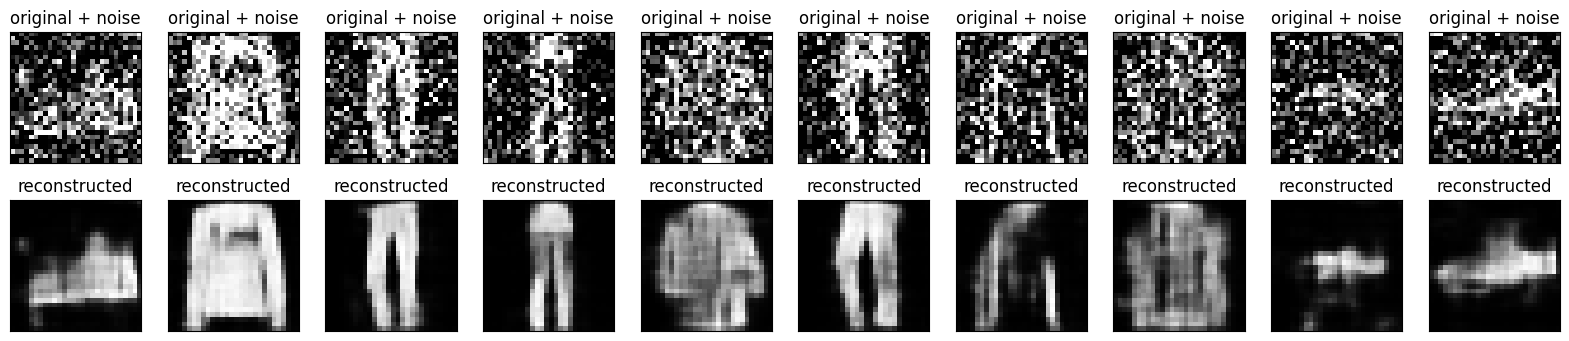

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

# Encode e decode as imagens
encoded_imgs = encoder.predict(x_test_noisy)
decoded_imgs = decoder.predict(encoded_imgs)

# Visualização das imagens
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # exibição da imagem original com ruído
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # exibição da imagem reconstruída
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()


#Gan - Generative adversarial network


In [ ]:
# Importando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Reshape
from keras.layers import Conv2D, Conv2DTranspose, LeakyReLU
from keras.optimizers import Adam

# Carregando e pré-processando os dados
(X_train, _), (_, _) = mnist.load_data()

# Normalizando os dados para o intervalo [-1, 1]
X_train = (X_train.astype(np.float32) - 127.5) / 127.5
X_train = np.expand_dims(X_train, axis=-1)

# Definindo os hiperparâmetros
img_rows = 28
img_cols = 28
channels = 1
img_shape = (img_rows, img_cols, channels)
latent_dim = 100

# Construindo o gerador
generator = Sequential()
generator.add(Dense(128 * 7 * 7, input_dim=latent_dim))
generator.add(LeakyReLU(alpha=0.2))
generator.add(Reshape((7, 7, 128)))
generator.add(Conv2DTranspose(128, kernel_size=3, strides=2, padding='same'))
generator.add(LeakyReLU(alpha=0.2))
generator.add(Conv2DTranspose(64, kernel_size=3, strides=1, padding='same'))
generator.add(LeakyReLU(alpha=0.2))
generator.add(Conv2DTranspose(channels, kernel_size=3, strides=2, padding='same', activation='tanh'))

# Construindo o discriminador
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=3, strides=2, input_shape=img_shape, padding='same'))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Conv2D(128, kernel_size=3, strides=2, padding='same'))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))

# Compilando o discriminador
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5), metrics=['accuracy'])

# Congelando os pesos do discriminador durante o treinamento do modelo combinado
discriminator.trainable = False

# Construindo e compilando a GAN combinada
gan = Sequential()
gan.add(generator)
gan.add(discriminator)
gan.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))

# Função para amostrar imagens geradas
def sample_images(epoch):
    r, c = 5, 5
    noise = np.random.normal(0, 1, (r * c, latent_dim))
    gen_imgs = generator.predict(noise)

    # Desfazendo a normalização
    gen_imgs = 0.5 * gen_imgs + 0.5

    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i,j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
            axs[i,j].axis('off')
            cnt += 1
    fig.savefig("gan_mnist_%d.png" % epoch)
    plt.close()

# Treinamento da GAN
epochs = 6000
batch_size = 128
sample_interval = 1000

for epoch in range(epochs):

    # Treinamento do discriminador
    idx = np.random.randint(0, X_train.shape[0], batch_size)
    imgs = X_train[idx]
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    gen_imgs = generator.predict(noise)

    d_loss_real = discriminator.train_on_batch(imgs, np.ones((batch_size, 1)))
    d_loss_fake = discriminator.train_on_batch(gen_imgs, np.zeros((batch_size, 1)))
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Treinamento do gerador
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    valid_y = np.array([1] * batch_size)
    g_loss = gan.train_on_batch(noise, valid_y)

    # Exibir o progresso do treinamento
    if epoch % sample_interval == 0:
        print(f"Epoch {epoch}, Discriminator Loss: {d_loss[0]}, Generator Loss: {g_loss}")
        sample_images(epoch)


11490434/11490434 [==============================] - 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


A saída de streaming foi truncada nas últimas 5000 linhas.
4/4 [==============================] - 0s 60ms/step
Epoch 1000, Discriminator Loss: 0.6159501671791077, Generator Loss: 0.8686477541923523
4/4 [==============================] - 0s 70ms/step
Epoch 2000, Discriminator Loss: 0.6621719598770142, Generator Loss: 0.778806209564209
4/4 [==============================] - 0s 66ms/step
Epoch 3000, Discriminator Loss: 0.7213056087493896, Generator Loss: 0.747501015663147
4/4 [==============================] - 0s 72ms/step
Epoch 4000, Discriminator Loss: 0.6806935966014862, Generator Loss: 0.8524401187896729
4/4 [==============================] - 0s 75ms/step
Epoch 5000, Discriminator Loss: 0.6726182401180267, Generator Loss: 0.7474101185798645
4/4 [==============================] - 0s 80ms/step


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Diretório onde as imagens geradas são salvas
image_dir = 'content/'

# Função para exibir as imagens geradas
def show_generated_images():
    for filename in os.listdir(image_dir):
        if filename.endswith('.png'):
            img = mpimg.imread(os.path.join(image_dir, filename))
            plt.imshow(img)
            plt.axis('off')
            plt.show()

# Chamar a função para exibir as imagens geradas
show_generated_images()
